##Prediksi Kemungkinan Seseorang Terkena Diabetes Dengan Clustering K-means
Bunga Dinda Endri Novita - A11.4612 - A11.2021.13786

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#path data
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33:06:00,0.435416667,50
1,1,85,66,29,0,26:06:00,0.24375,31
2,8,183,64,0,0,23:03,0.466666667,32
3,1,89,66,23,94,28:01:00,0.115972222,21
4,0,137,40,35,168,43:01:00,"2,288",33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32:09:00,0.11875,63
764,2,122,70,27,0,36:08:00,0:34,27
765,5,121,72,23,112,26:02:00,0.170138889,30
766,1,126,60,0,0,30:01:00,0.242361111,47


In [ ]:
# Dimensi Data (baris, kolom)
df.shape

(768, 8)

In [ ]:
#Check Tipe Data
df.dtypes

Pregnancies                  int64
Glucose                      int64
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                         object
DiabetesPedigreeFunction    object
Age                          int64
dtype: object

In [ ]:
#PREPROCESSING
#mengecek missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
#mengecek data duplikat
df.duplicated().sum()

0

In [ ]:
#DATA TRANSFORMATION
# cek jumlah kategori pada atribut
print(pd.value_counts(df.Pregnancies))

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


In [ ]:
print(pd.value_counts(df.Glucose))

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


In [ ]:
print(pd.value_counts(df.BloodPressure))

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


In [ ]:
print(pd.value_counts(df.SkinThickness))

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


In [ ]:
print(pd.value_counts(df.Insulin))

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


In [ ]:
print(pd.value_counts(df.BMI))

32          13
31:06:00    12
31:02:00    12
0           11
32:04:00    10
            ..
36:07:00     1
41:08:00     1
42:06:00     1
42:08:00     1
46:03:00     1
Name: BMI, Length: 248, dtype: int64


In [ ]:
print(pd.value_counts(df.DiabetesPedigreeFunction))

0.179166667    6
0.176388889    6
0.186111111    5
0.14375        5
0.18125        5
              ..
1,353          1
0.454861111    1
0.092          1
0.643055556    1
0.11875        1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


In [ ]:
print(pd.value_counts(df.Age))

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


In [ ]:
# Menghilangkan kolom yang tidak digunakan
df = df.drop(["Pregnancies","BloodPressure","SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction"], axis = 1)
df.tail()

,Glucose,Age
763,101,63
764,122,27
765,121,30
766,126,47
767,93,23


Text(0, 0.5, 'Glucose')

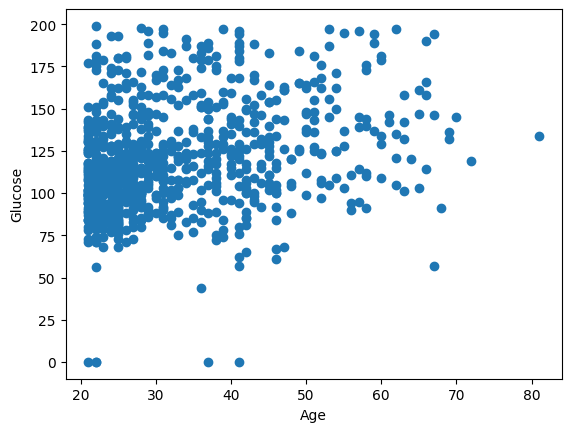

In [ ]:
# Visualisasi Persebaran Data
plt.scatter(df['Age'], df['Glucose'])
plt.xlabel('Age')
plt.ylabel('Glucose')

In [ ]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
df_scaled

array([[ 0.84832379,  1.4259954 ],
       [-1.12339636, -0.19067191],
       [ 1.94372388, -0.10558415],
       ...,
       [ 0.00330087, -0.27575966],
       [ 0.1597866 ,  1.17073215],
       [-0.8730192 , -0.87137393]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=['Age','Glucose'])
df_scaled

,Age,Glucose
0,0.848324,1.425995
1,-1.123396,-0.190672
2,1.943724,-0.105584
3,-0.998208,-1.041549
4,0.504055,-0.020496
...,...,...
763,-0.622642,2.532136
764,0.034598,-0.531023
765,0.003301,-0.275760
766,0.159787,1.170732


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

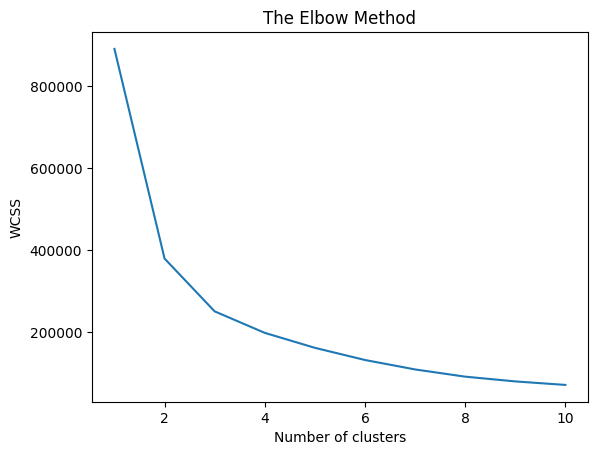

In [ ]:
# Menggunakan Elbow Method untuk menemukan jumlah cluster yang optimal
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2,

In [ ]:
df['Cluster'] = y_kmeans
df

,Glucose,Age,Cluster
0,148,50,2
1,85,31,1
2,183,32,2
3,89,21,1
4,137,33,0
...,...,...,...
763,101,63,1
764,122,27,0
765,121,30,0
766,126,47,0


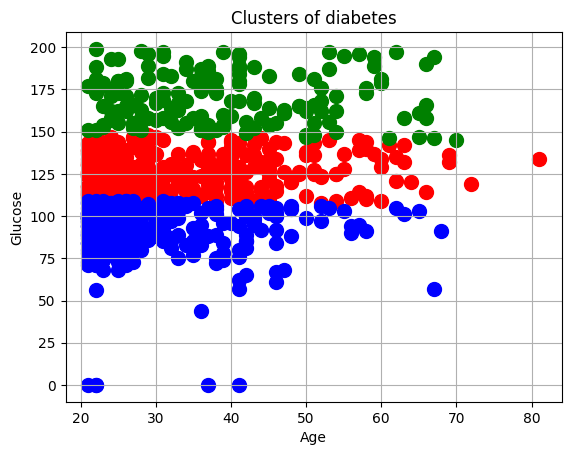

In [ ]:
#Visualisasi cluster
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Glucose'],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df2.Age,df2['Glucose'],s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df3.Age,df3['Glucose'],s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of diabetes')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.grid()

In [ ]:
# Evaluation
labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(df, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.8069567770965982


In [ ]:
# Memasukkan Hasil K-Means Clustering ke Dataframe
conditions = [
    (df['Cluster']==0),
    (df['Cluster']==1),
    (df['Cluster']==2)]
choices = ['Rendah','Normal','Tinggi']
df['Cluster'] = np.select(conditions, choices)
df

,Glucose,Age,Cluster
0,148,50,Tinggi
1,85,31,Normal
2,183,32,Tinggi
3,89,21,Normal
4,137,33,Rendah
...,...,...,...
763,101,63,Normal
764,122,27,Rendah
765,121,30,Rendah
766,126,47,Rendah
